# CNN에서 데이터가 적으면 왜 문제가 될까?

> 미지수와 방정식 수의 관계에서
- 해가  존재하려면 미지수 수 = 방정식 수

> CNN에서 kernel = 3*3 커널이 10개라면 90개
- 데이터도 90개가 있어야 하는데
- 데이터에 비해 미지수가 너무 많기 때문에

> 적은 샘플로 학습하는 방법 
1.  Augmentation: 영상을 기학학적인 방법으로 뻥튀기해서 사용 => affin transformation
2.  전이학습: 이미 정해놓은 weight를 사용하므로, 학습할 weight 수가 줄어들어서 해결 가능




> keras augmentation
- flip, resize, shift, rotatiom 등이 모두 동시에 적용될 수 있음.
- 동시에 적용되므로 *의 개념으로 경우의 수가 매우 많음.

# transformation

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
    plt.show()

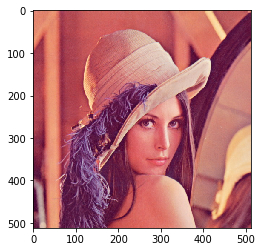

In [16]:
img = cv2.imread('images/lena.jpg', 1)
imshow('',img)

# 1. flip


## 1.1. 상하반전: 옵션 0

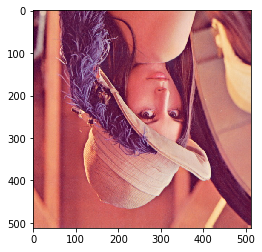

In [17]:
img_flip = cv2.flip(img, 0)
imshow('', img_flip)

## 1.2. 좌우반전: 옵션= 1

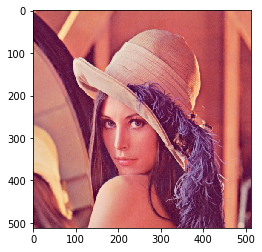

In [18]:
img_flip2 = cv2.flip(img, 1)
imshow('', img_flip2)

# 2. resize

In [21]:
img.shape

(512, 512, 3)

## 2.1. 원하는 size

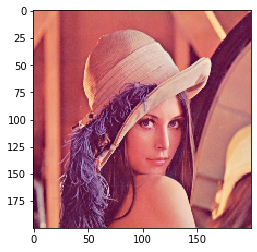

In [20]:
img_resize = cv2.resize(img, 
                        (200,200),
                       interpolation = cv2.INTER_CUBIC)
imshow('', img_resize)

## 2.1. 비율로 줄이기(수동) -> 권장 x

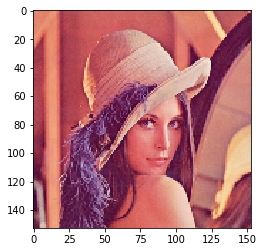

In [31]:
height =img.shape[0]
width = img.shape[1]

# wight의 개념으로 곱해주기
img_zoom = cv2.resize(img, (int(height * 0.3), int(width*0.3)), 
                interpolation = cv2.INTER_CUBIC)

imshow('', img_zoom)

## 2.2. 비율로 조절하기

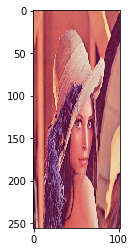

In [32]:
img_zoom2 = cv2.resize(img,
                      None,
                      fx = 0.2,
                      fy = 0.5,
                      interpolation = cv2.INTER_CUBIC)
imshow('', img_zoom2)

# 3.crop 

(200, 120, 3)


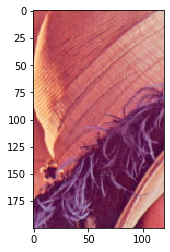

In [36]:
img_crop = img[100:300,120:240]
print(img_crop.shape)
imshow('',img_crop)

# 4. 이동( shift)

## 4.1 변환 행렬, x축으로 10, y축으로 20이동

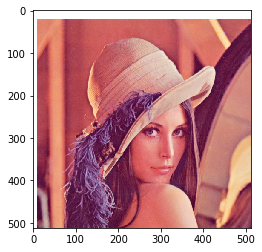

In [40]:
height, width = img.shape[:2]

# 이동하고자 하는 행렬 만들기
M = np.float32([[1,0,10],  # x축으로 10
                [0,1,20]])  # y축으로 20 이라는 뜻

# 항등행렬의 개념 이용

img_des = cv2.warpAffine(img, 
                        M,   # 이동할 행렬
                        dsize= (width, height),  # 출력할 이미지 크기 
                        borderValue = (255,255,255)  # 빈공간 채우기, default: black
                        )

imshow('', img_des)

- 실제로 딥러닝에서는 augmantation할 때 옆픽셀 값으로 채워져서 쭉 늘어난 것처럼 보임

## 4.2. 랜덤하게 이동하는 이미지 10개 만들기
- for문 안에 내용이 많을 수록 연산이 많아짐...

### 방법1

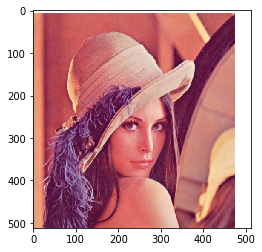

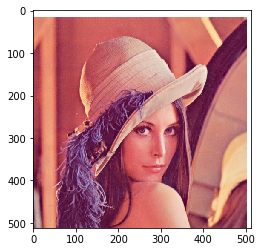

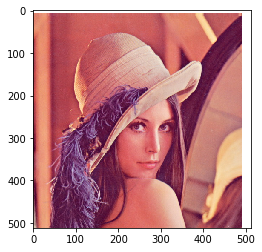

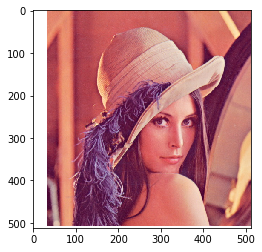

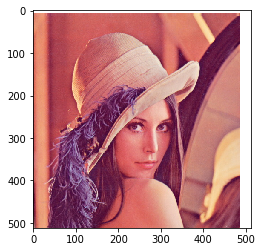

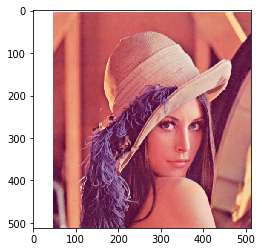

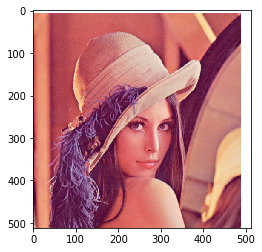

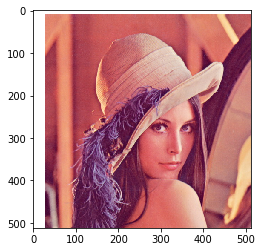

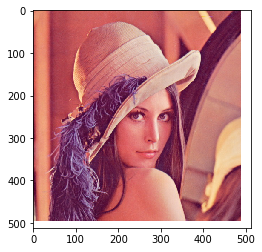

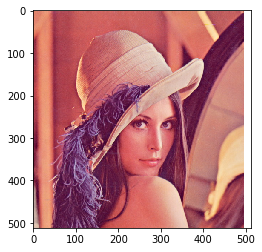

In [54]:
n = 10
dx = 50
dy = 20

for i in range(n):
    x = np.random.randint(-1 * dx, dx)
    y = np.random.randint(-1 * dy,dy)
    M = np.float32([[1,0,x],  # x축으로 10
                [0,1,y]])  # y축으로 20 이라는 뜻

    img_des = cv2.warpAffine(img, 
                                M,   # 이동할 행렬
                                dsize= (width, height),  # 출력할 이미지 크기 
                                borderValue = (255,255,255)  # 빈공간 채우기, default: black
                                )

    imshow('', img_des)

#### 방법2

In [56]:
height, width = img.shape[:2]


dx = 50

r = np.random.randint(dx*2, size = (20, 2)) - dx
r

array([[  8, -23],
       [-31,  22],
       [ -8,   2],
       [-10,  18],
       [ 11, -14],
       [ 43, -41],
       [-40, -15],
       [ 18,  28],
       [-21,  -4],
       [ 25,  16],
       [ 38,  14],
       [  2,  -6],
       [-31, -35],
       [-32, -30],
       [ 49, -42],
       [ 45,  -1],
       [ 11,   7],
       [ 19,  30],
       [ -7,  -2],
       [  6, -12]])

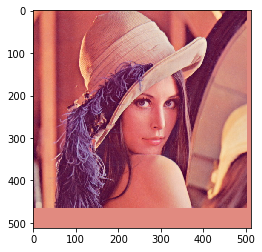

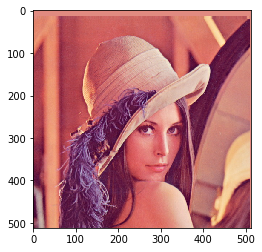

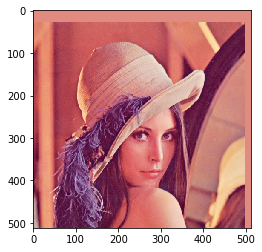

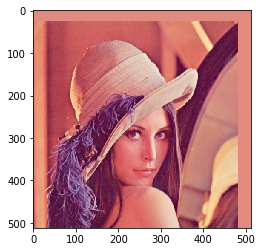

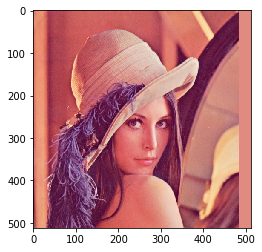

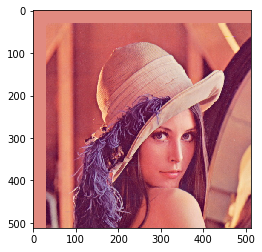

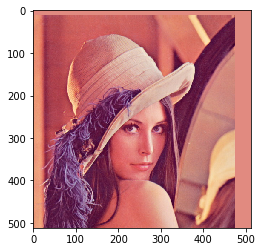

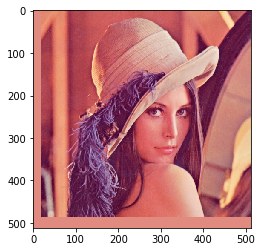

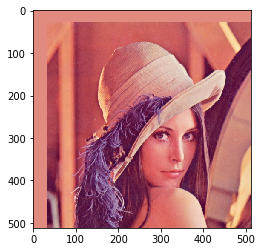

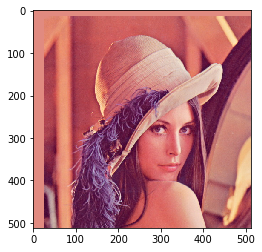

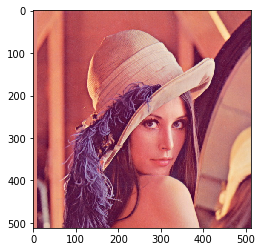

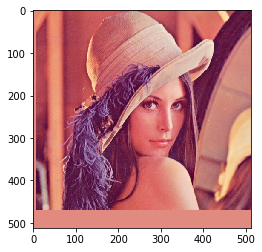

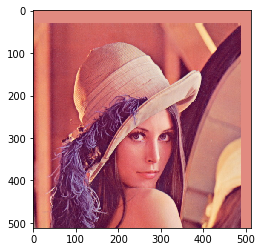

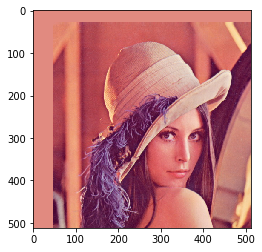

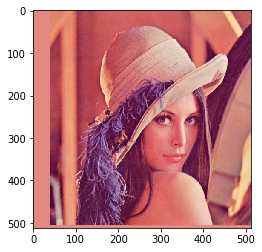

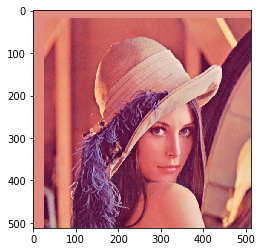

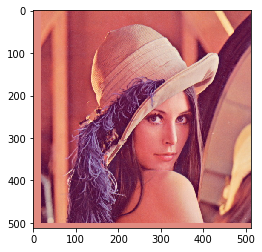

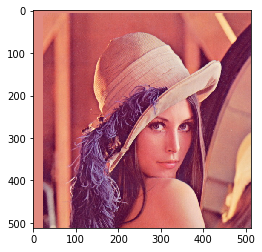

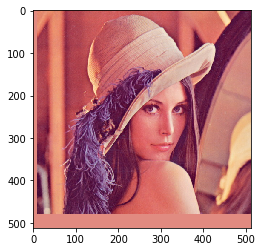

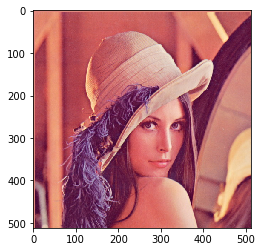

In [55]:
M = np.float32([[1,0,0],  
                [0,1,0]])  

c = img[0,0]

for p in r.tolist():
    M[:,2]= p
    
    des = cv2.warpAffine(img, 
                        M,   # 이동할 행렬
                        dsize= (width, height),  # 출력할 이미지 크기 
                        borderValue = (int(c[0]),int(c[1]),int(c[2]) )  # 빈공간 채우기, default: black
                        )

    imshow('', des)

# 5. rotate

## 5.1. 중심 기준으로 반시계방향으로 45도 회전

In [60]:
height, width = img.shape[:2]

# 중심점: 이미지의 중심
img_center = (width/2, height/2)

# 회전값 계산하는 함수(45도 사용 x, 4/파이 개념으로 사용)
M = cv2.getRotationMatrix2D(img_center, # 중심점
                            angle= 45,    # 몇 도인지(사람의 개념으로), 반식 방향으로
                            scale= 1.0)

M  # 360도 기준 아닌 파이 기준


array([[   0.70710678,    0.70710678, -106.03867197],
       [  -0.70710678,    0.70710678,  256.        ]])

In [64]:
'''M의 의미 : 회전량, 이동량 모두 고려해서 나온 메트릭스
[cos(theta) sin(theta)  이동량(x축)
 -sin(theta)  cos(theta)]  이동량(y축)

 '''

'M의 의미 : 회전량, 이동량 모두 고려해서 나온 메트릭스\n[cos(theta) sin(theta)  이동량(x축)\n -sin(theta)  cos(theta)]  이동량(y축)\n\n '

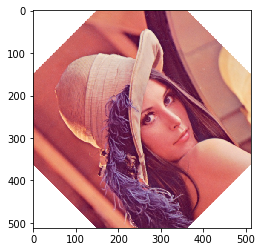

In [61]:
img_rotate = cv2.warpAffine(img, M, (width, height), borderValue = (255,255,255))

imshow('',img_rotate)

## 5.2. 중심 기준으로 스케일 조절

In [66]:
height, width = img.shape[:2]

# 중심점: 이미지의 중심
img_center = (width/2, height/2)

# 회전값 계산하는 함수(45도 사용 x, 4/파이 개념으로 사용)
M = cv2.getRotationMatrix2D(img_center, # 중심점
                            angle= 45,    # 몇 도인지(사람의 개념으로), 반식 방향으로
                            scale= 0.5)

M  # 360도 기준 아닌 파이 기준



array([[  0.35355339,   0.35355339,  74.98066402],
       [ -0.35355339,   0.35355339, 256.        ]])

In [67]:
'''M의 의미 : 회전량, 이동량 모두 고려해서 나온 메트릭스
[cos(theta) sin(theta)  이동량(x축)
 -sin(theta)  cos(theta)]  이동량(y축)

# scale factor = 0.5가 되면
0.5 * M이 나옴.
M = (scale factor * 회전량,) 이동량의 개념


 '''

'M의 의미 : 회전량, 이동량 모두 고려해서 나온 메트릭스\n[cos(theta) sin(theta)  이동량(x축)\n -sin(theta)  cos(theta)]  이동량(y축)\n\n# scale factor = 0.5가 되면\n0.5 * M이 나옴.\nM = scale factor * 최전량, 이동량의 개념\n\n\n '

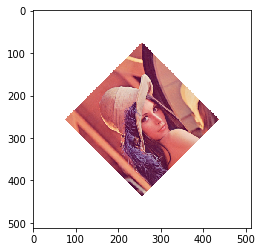

In [68]:
img_rotate = cv2.warpAffine(img, M, (width, height), borderValue = (255,255,255))

imshow('',img_rotate)

# 6. 회전 + perspective(원근) 효과 

> affintransformation
- 선형 변환의 의미
- shift, rotation, scale, perspective , crop 등 모두 적용

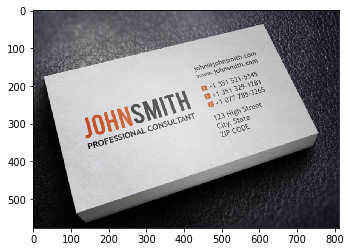

In [77]:
img = cv2.imread('./images/namecard.png', 1)

imshow('', img)

## 6.1. 원본 이미지 크기와 같게 나타캐기

In [70]:
height, width = img.shape[:2]

In [80]:
# 좌표 순서 = 왼쪽 상단끝, 상단 오른쪽 끝, 하단 왼쪽 끝, 하단 오른쪽끝
point_list = [[27,179],[611,34],[118,534],[754,325]]

# 명함의 네 꼭지점
pts1 = np.float32([list(point_list[0]),
                  list(point_list[1]),
                  list(point_list[2]),
                  list(point_list[3])])
pts1

# pts1 = np.array([[27,179],[611,34],[118,534],[754,325]], dtype = 'float32')

array([[ 27., 179.],
       [611.,  34.],
       [118., 534.],
       [754., 325.]], dtype=float32)

In [81]:
# 생성될 목적 이미지 좌표
pts2 = np.float32([[0,0],[width,0],[0,height],[width, height]])
pts2

array([[  0.,   0.],
       [811.,   0.],
       [  0., 577.],
       [811., 577.]], dtype=float32)

In [82]:
# perspective, scalimg 모두 계산
M = cv2.getPerspectiveTransform(pts1, pts2)
M
# 회전/ 스케일, 이동량

array([[ 1.22793749e+00, -3.14767074e-01,  2.31889941e+01],
       [ 4.58118299e-01,  1.84511094e+00, -3.42644053e+02],
       [-1.20458444e-04,  4.15115907e-04,  1.00000000e+00]])

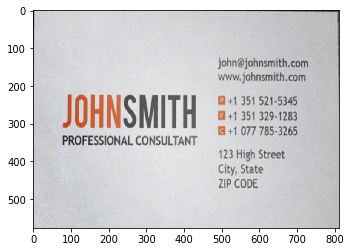

In [83]:
img_result = cv2.warpPerspective(img, M, (width, height))

imshow('', img_result)

## 6.2 원본 이미지의 scale: 0.5

In [84]:
# 생성될 목적 이미지 좌표
pts3 = np.float32([[0,0],[width/2,0],[0,height/2],[width/2, height/2]])
pts3

array([[  0. ,   0. ],
       [405.5,   0. ],
       [  0. , 288.5],
       [405.5, 288.5]], dtype=float32)

In [87]:
# perspective, scalimg 모두 계산
M = cv2.getPerspectiveTransform(pts1, pts3)
M

array([[ 6.13968743e-01, -1.57383537e-01,  1.15944970e+01],
       [ 2.29059149e-01,  9.22555471e-01, -1.71322026e+02],
       [-1.20458444e-04,  4.15115907e-04,  1.00000000e+00]])

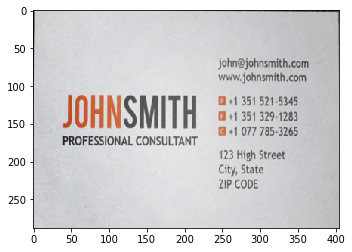

In [88]:
img_result2 = cv2.warpPerspective(img, M, (int(width/2), int(height/2)))

imshow('', img_result2)

## 6.3. 실제 명함 크기로 출력하기

In [80]:
# 좌표 순서 = 왼쪽 상단끝, 상단 오른쪽 끝, 하단 왼쪽 끝, 하단 오른쪽끝
point_list = [[27,179],[611,36],[118,534],[754,325]]

# 명함의 네 꼭지점
pts1 = np.float32([list(point_list[0]),
                  list(point_list[1]),
                  list(point_list[2]),
                  list(point_list[3])])
pts1

# pts1 = np.array([[27,179],[611,34],[118,534],[754,325]], dtype = 'float32')

array([[ 27., 179.],
       [611.,  34.],
       [118., 534.],
       [754., 325.]], dtype=float32)

In [70]:
height = sqrt(((534-118)**2) + (())) 
width = sqrt(((611-27)**2) + ((36-179)**2))

In [81]:
# 생성될 목적 이미지 좌표
pts2 = np.float32([[0,0],[width,0],[0,height],[width, height]])
pts2

array([[  0.,   0.],
       [811.,   0.],
       [  0., 577.],
       [811., 577.]], dtype=float32)

In [82]:
# perspective, scalimg 모두 계산
M = cv2.getPerspectiveTransform(pts1, pts2)
M
# 회전/ 스케일, 이동량

array([[ 1.22793749e+00, -3.14767074e-01,  2.31889941e+01],
       [ 4.58118299e-01,  1.84511094e+00, -3.42644053e+02],
       [-1.20458444e-04,  4.15115907e-04,  1.00000000e+00]])

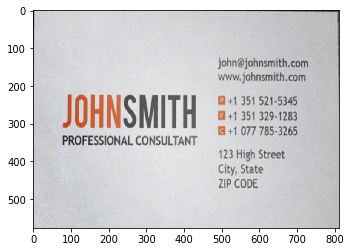

In [83]:
img_result = cv2.warpPerspective(img, M, (width, height))

imshow('', img_result)

# office lens 앱
- 문서를 회전, 고주파성분(글자)를 강조하고, 
- https://www.microsoft.com/en-us/p/office-lens/9wzdncrfj3t8?activetab=pivot:overviewtab

# 7. translation , M

In [89]:
'''
x' = x + 50
y' = y + 30
=> 행렬로 표현하면 
x' = [1 0 50][x
y' = [0 1 30]y]
=> 항등 행렬 이용
'''

"\nx' = x + 50\ny' = y + 30\n=> 행렬로 표현하면 \nx' = [1 0 50][x\ny' = [0 1 30]y]\n=> 항등 행렬 이용\n"

> 3*3 으로 만든이유
- 일반화 할 수 있기 때문에 
- https://campus.datacamp.com/courses/biomedical-image-analysis-in-python/image-comparison?ex=4

# 8. 실습해보자: 폴라로이드

## 8.1. 테두리 찾기

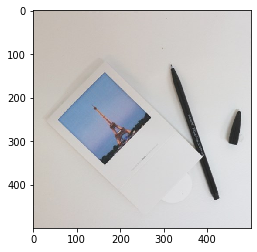

In [138]:
img = cv2.imread('./images/pics.jpg', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imshow('', img)

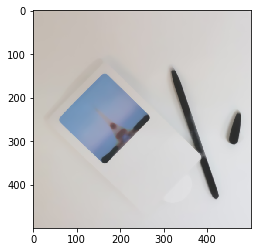

In [146]:
img_blur = cv2.medianBlur(img, 15)

imshow('', img_blur)

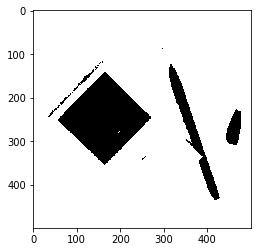

In [173]:
_, binary = cv2.threshold(gray, 180,
                          255, cv2.THRESH_BINARY)
imshow('', binary)

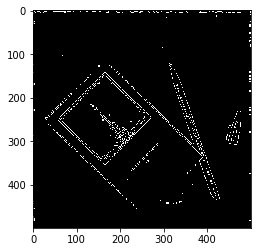

In [163]:
edged = cv2.Canny(binary, 10, 250)

imshow('', edged)

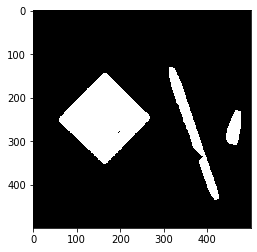

In [183]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
closed = 255-closed
imshow('',closed)

In [195]:
pic =img.copy()
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

len(contours)

3

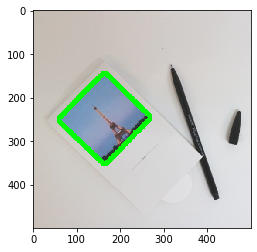

In [197]:
area_con =[] 
approx_con = []
for contour in contours:
    peri = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    area_con.append(area)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    approx_con.append(approx)
    if len(approx) == 4:
        cv2.drawContours(pic, [approx], -1, (0, 255, 0), 4)
#         total += 1
    
    
#     cv2.drawContours(pic, [contours[i]],-1, (0,255,0), 10 )

imshow('', pic)

In [194]:
area_con

[1866.0, 22995.0, 6146.5]

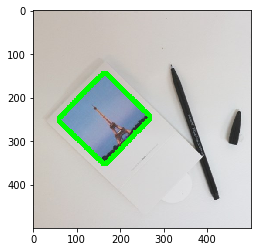

In [196]:
cv2.drawContours(pic, [contours[1]],-1, (0,255,0), 10 )
imshow('', pic)

In [200]:
# 좌표값
approx_con[1]

array([[[161, 145]],

       [[ 59, 254]],

       [[167, 352]],

       [[268, 243]]], dtype=int32)

## 8.2 Affin 변환

In [222]:
height, width = img.shape[:2]
height, width

(500, 500)

In [243]:
# 좌표 순서 = 왼쪽 상단끝, 상단 오른쪽 끝, 하단 왼쪽 끝, 하단 오른쪽끝
point_list = approx_con[1].reshape(4,2)
pts1 = np.float32([list(point_list[1]),
                  list(point_list[0]),
                  list(point_list[2]),
                  list(point_list[3])])

In [244]:
# 생성될 목적 이미지 좌표
pts2 = np.float32([[0,0],[width/2,0],[0,height/2],[width/2, height/2]])
pts2

array([[  0.,   0.],
       [250.,   0.],
       [  0., 250.],
       [250., 250.]], dtype=float32)

In [245]:
# perspective, scalimg 모두 계산
M = cv2.getPerspectiveTransform(pts1, pts2)
M
# 회전/ 스케일, 이동량

array([[ 1.11792208e+00, -1.23199576e+00,  2.46969521e+02],
       [ 1.24403462e+00,  1.16414249e+00, -3.69090234e+02],
       [-4.52240433e-05,  3.74779912e-06,  1.00000000e+00]])

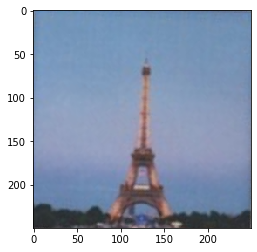

In [248]:
img_result = cv2.warpPerspective(img, M, (int(width/2), int(height/2)))

imshow('', img_result)

# 9. 실습해보자: 명함 + ocr

## 9.1. 테두리 찾기

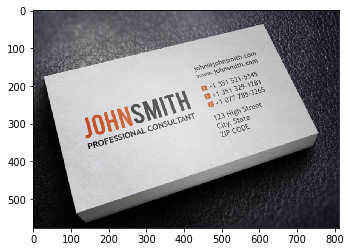

In [261]:
img = cv2.imread('./images/namecard.png', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imshow('', img)

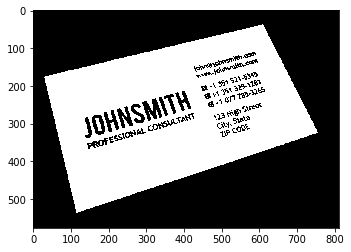

In [262]:
_, binary = cv2.threshold(gray, 180,
                          255, cv2.THRESH_BINARY)
imshow('', binary)

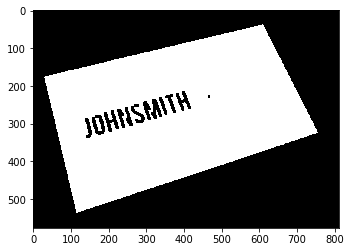

In [264]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
# closed = 255-closed
imshow('',closed)

In [265]:
pic =img.copy()
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

len(contours)

1

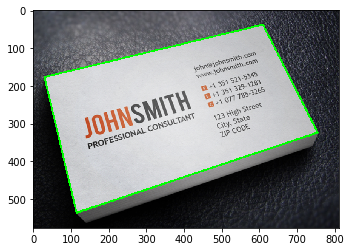

In [266]:
area_con =[] 
approx_con = []
for contour in contours:
    peri = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    area_con.append(area)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    approx_con.append(approx)
    if len(approx) == 4:
        cv2.drawContours(pic, [approx], -1, (0, 255, 0), 4)
#         total += 1
    
    
#     cv2.drawContours(pic, [contours[i]],-1, (0,255,0), 10 )

imshow('', pic)

In [268]:
# 좌표값
approx_con[0]

array([[[609,  38]],

       [[ 30, 177]],

       [[115, 536]],

       [[754, 324]]], dtype=int32)

## 9.2 Affin 변환

In [269]:
height, width = img.shape[:2]
height, width

(577, 811)

In [272]:
# 좌표 순서 = 왼쪽 상단끝, 상단 오른쪽 끝, 하단 왼쪽 끝, 하단 오른쪽끝
point_list = approx_con[0].reshape(4,2)
pts1 = np.float32([list(point_list[1]),
                  list(point_list[0]),
                  list(point_list[2]),
                  list(point_list[3])])


# index 순서 바꾸기
# idx = [1,0,2,3]
# pts1 = np.array(approx_con[0][idx, 0,:]) 

In [302]:
# 생성될 목적 이미지 좌표
pts2 = np.float32([[0,0],[width/2,0],[0,height/2],[width/2, height/2]])
pts2.shape

(4, 2)

In [274]:
# perspective, scalimg 모두 계산
M = cv2.getPerspectiveTransform(pts1, pts2)
M
# 회전/ 스케일, 이동량

array([[ 6.18298031e-01, -1.46393684e-01,  7.36274118e+00],
       [ 2.26873227e-01,  9.45033080e-01, -1.74077052e+02],
       [-1.40110854e-04,  4.83067513e-04,  1.00000000e+00]])

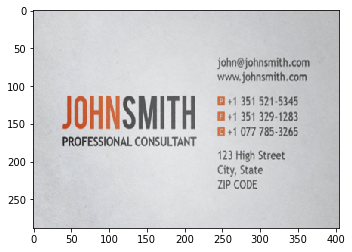

In [275]:
img_result = cv2.warpPerspective(img, M, (int(width/2), int(height/2)))

imshow('', img_result)

## 9.3. ocr 인식

In [276]:
cv2.imwrite('./images/namecard1.png', img_result)

True

In [279]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR/tesseract.exe'


print(pytesseract.image_to_string('./images/namecard1.png'))


JOHNSMITH

PROFESSIONAL CONSULTANT

john@johnsmith.com
‘www. johnsmith.com

+1 351 521-5345
+1 351 329-1283
+1 077 785-3265

123 High Street
City, State
IP CODE


# 10.interpolation의 개념

## 확대할 때

### 전방향 사상
#### reverse 문제, hold문제 발생
> 영상을 2배로 확대할 때
- 원본을 기준으로 출력값을 계산할 것 같으나(원본이 입력, 결과가 출력같지만..)
- 원본으로 출력을 만드는 것이 아니라
- (원본의 픽셀에서 출력의 픽셀을 만드는 것이 아니라 -> hole문제 발생
- 출력이미지에서의 값은 원본에서 어디지를 찾게 됨.


### 역방향 사상
- 목적 영상에서 원시 영상의 화소값을 찾는 것.

### 보간법
> Nearest Neighbor interpolation
- 가장 가까운 화소 값 사용
- 확대했을 때 영상 품질 저하. 
- 처리 속도는 빠르지만, 시각적인 뭉특함-> 계단현상 발생

> Linear interpolation, 선형 보간법
- 양 옆 화소의 중간값으로 사용.  

## 축소할 때

- 얇은 선은 축소하면 없어짐.
- 블러링한 후 축소하기
- 블러링하면 얇은 선 값이 옆 픽셀까지 적용되어 선이 두꺼워지므로(흐려질 수는 있으나)
- 축소해도 선이 살아있음.

# 11. M(affintranformation)의 메트릭스

- https://people.gnome.org/~mathieu/libart/libart-affine-transformation-matrices.html

> 행렬곱 연산을 위해서 3 * 3으로 처리
- affin변환: 스케일, 회전, 이동, 원근을 조절 가능


<img src ='./images/affin.png'>